# **Import Libraries**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **What is Computer Vision**

**Computer Vision is the practice of Writing Algorithms we can Discover Pattern in Visual Data such  as Camera Of Self Driving car Recognize Car in Front**

# **Architecture Of CNN**

**1-Input_Layer**

**2_Input_image**

**3-Convolutional_layer**

**4-Hidden_Activation**

**5-Pooling_Layers**

**6-Output_Layers**

**7-Output_Activation**

**It is Combination of Convolutional Layer and Pooling Layers and Bunch of Hidden Activation Function** 

In [2]:
# Search Food Dataset 101 & Download Dataset

In [3]:
import zipfile

In [4]:
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"

--2022-02-18 05:14:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   202MB/s    in 0.5s    

2022-02-18 05:14:20 (202 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [5]:
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

**We Start With Smaller Dataset So That We can Experiment Quickly and Figure what work**

# **Becoming One With Data**

**Inspect The data** (A Very Crucial Step)



In [6]:
! ls pizza_steak/

test  train


In [7]:
!ls pizza_steak/train

pizza  steak


In [8]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [9]:
import os 

# Walk Through Pizza Steak Directory and List Number of Files 

for dirpath,dirnames,filenames in os.walk('pizza_steak'):
  print(f"There Are {len(dirnames)} Directories And {len(filenames)} Images in '{dirpath}'")

There Are 2 Directories And 0 Images in 'pizza_steak'
There Are 2 Directories And 0 Images in 'pizza_steak/test'
There Are 0 Directories And 250 Images in 'pizza_steak/test/pizza'
There Are 0 Directories And 250 Images in 'pizza_steak/test/steak'
There Are 2 Directories And 0 Images in 'pizza_steak/train'
There Are 0 Directories And 750 Images in 'pizza_steak/train/pizza'
There Are 0 Directories And 750 Images in 'pizza_steak/train/steak'


In [10]:
! ls-la pizza_steak/

# The Extra File In Our Pizza Steak directory is .DS-Store

/bin/bash: ls-la: command not found


In [11]:
#Another Way to Find Out Images In File

num_steak_images_train = len(os.listdir('pizza_steak/train/steak')) 

In [12]:
num_steak_images_train

750

In [13]:
# To Visualize Images , First Get Class Names Programmatically

import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*') ]))
print(class_names)

['pizza' 'steak']


In [14]:
# Lets Visualize Our Images 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [15]:
def view_random_image(target_dir, target_class):

  # Set Up Target Directory 

  target_folder = target_dir + target_class
  
  # Get Random Image Path

  random_image = random.sample(os.listdir(target_folder),1)

  #Read The Image & Plot it Using Matplotlib

  img = mpimg.imread(target_folder + '/' + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image Shape : {img.shape}")

  return img



Image Shape : (512, 512, 3)


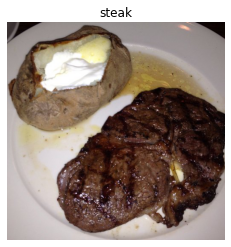

In [16]:
# View Random Image From Training Dataset 

img = view_random_image(target_dir = 'pizza_steak/train/', target_class = 'steak')

**Why We Return Img**

**It Is Because Wjen it Comes to mpimg , it consist of made of array**

In [17]:
#View Image Shape

img.shape #Return Width, Height , ColorChannel

(512, 512, 3)

In [18]:
# Get All Pixel Values Between 0 & 1

img/255.

array([[[0.25882353, 0.22352941, 0.22745098],
        [0.25098039, 0.21568627, 0.21960784],
        [0.24313725, 0.20784314, 0.21176471],
        ...,
        [0.03921569, 0.00392157, 0.00784314],
        [0.03921569, 0.00392157, 0.00784314],
        [0.03921569, 0.00392157, 0.00784314]],

       [[0.2627451 , 0.22745098, 0.23137255],
        [0.25490196, 0.21960784, 0.22352941],
        [0.24705882, 0.21176471, 0.21568627],
        ...,
        [0.03921569, 0.00392157, 0.00784314],
        [0.03921569, 0.00392157, 0.00784314],
        [0.03921569, 0.00392157, 0.00784314]],

       [[0.26666667, 0.23137255, 0.23529412],
        [0.25882353, 0.22352941, 0.22745098],
        [0.25098039, 0.21568627, 0.21960784],
        ...,
        [0.04313725, 0.00784314, 0.01176471],
        [0.04705882, 0.01176471, 0.01568627],
        [0.04705882, 0.01176471, 0.01568627]],

       ...,

       [[0.70196078, 0.65490196, 0.65490196],
        [0.70196078, 0.65490196, 0.65490196],
        [0.70196078, 0

# **Build End To End CNN Model**

**Load Our Images**

**Preprocess Our Image**

**Build a CNN Model to find pattern in our image**

**Compile Our CNN**

**Fit The CNN to Our Training Data**


In [19]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
# Set The  Random Seed

tf.random.set_seed(42)

# Process The Data (Get All Data B/W 0 & 1)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# SetUp Path To Our Data Directories

train_dir = '/content/pizza_steak/train'

test_dir = 'pizza_steak/test'


#Import Data From Directories & Turn it Into Batches

train_data = train_datagen.flow_from_directory(
    directory = train_dir, batch_size=32,
    target_size=(224,224),
    class_mode = 'binary',
    seed = 42
)

valid_data = valid_datagen.flow_from_directory(
    directory = test_dir,
    batch_size=32,
    target_size=(224,224),
    class_mode = 'binary',
    seed=42
)




Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


# **Build CNN Model (Same as Tiny VGG on CNN Explainer Website)**

In [21]:
# MODEL NO 1

model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,kernel_size =3,activation='relu', input_shape=(224,224,3)),
                                      tf.keras.layers.Conv2D(10,3,activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
                                      tf.keras.layers.Conv2D(10,3,activation='relu'),
                                      tf.keras.layers.Conv2D(10,3,activation='relu'),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1,activation='sigmoid')
])


# COMPILE OUR CNN

model_1.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# FIT THE MODEL

history_1 =  model_1.fit(train_data, epochs=5, steps_per_epoch= len(train_data), validation_data = valid_data, validation_steps= len(valid_data))

Epoch 1/5
47/47 [==============================] - 23s 204ms/step - loss: 0.5779 - accuracy: 0.6847 - val_loss: 0.4028 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4183 - accuracy: 0.8107 - val_loss: 0.3502 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3875 - accuracy: 0.8333 - val_loss: 0.2997 - val_accuracy: 0.8800
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3588 - accuracy: 0.8513 - val_loss: 0.3299 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3224 - accuracy: 0.8640 - val_loss: 0.2993 - val_accuracy: 0.8840


# **Using GPU To Run It Faster**

**Google Colab Provide One GPU for Free of us**

**Go To Runtime, Change Runtime & Set it Into GPU**

**Find Run & Restart The Files Because Changing it into GPU Delete all files**

**If a Cell Talking time more than 10 seconds then switch the hardware accelerator to GPU**

**Go To CNN Expaliner Website & Gave 10 Min**

In [22]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# **Trying NON CNN Model**

**Lets Replicate Process Previous Model Without Using Image Data**



In [23]:
# Model No 2

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compile The Model

model_2.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)


# Fit The Model

history_2 = model_2.fit(train_data,epochs=5, steps_per_epoch= len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 179ms/step - loss: 0.9532 - accuracy: 0.5120 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


# **Adding More Layers**

**Lets Try To improve the Model**

**Same as Previous Model With Same Changes Flatten(Shape)**

In [24]:
# Model No 3

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid'),
                               tf.keras.layers.Flatten()
])

# Compile The Model

model_3.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit The Model

history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch = len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 17s 339ms/step - loss: 0.6867 - accuracy: 0.0000e+00 - val_loss: 0.6789 - val_accuracy: 0.0000e+00
Epoch 2/5
47/47 [==============================] - 15s 326ms/step - loss: 0.6737 - accuracy: 0.0000e+00 - val_loss: 0.6697 - val_accuracy: 0.0000e+00
Epoch 3/5
47/47 [==============================] - 15s 326ms/step - loss: 0.6684 - accuracy: 0.0000e+00 - val_loss: 0.6664 - val_accuracy: 0.0000e+00
Epoch 4/5
47/47 [==============================] - 16s 328ms/step - loss: 0.6639 - accuracy: 0.0000e+00 - val_loss: 0.6564 - val_accuracy: 0.0000e+00
Epoch 5/5
47/47 [==============================] - 15s 328ms/step - loss: 0.6605 - accuracy: 6.6667e-04 - val_loss: 0.6596 - val_accuracy: 0.0000e+00


# **Breaking Our CNN Model**

**Binary Classification : Lets Break It Down**

**1- Become One With Data**

**2- Preprocess The Data**

**3-Created A Model**

**4-Fit The Model**

**5-Evaluate The Model**

**6- Adjust Different Parameters And Improve The Model**

**7- Repeat Untill Satisfied**

# **Become With Data**

Image Shape : (512, 512, 3)
Image Shape : (512, 512, 3)


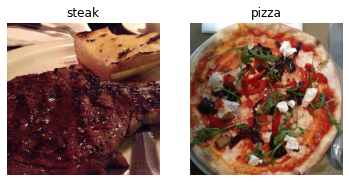

In [25]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/' ,'steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/',  'pizza')

# **Preprocess The Data**

In [26]:
# Split The Data Into Training & Test Sets

train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

In [27]:
# Turn Data Into Batches 

#(Batches is Small Subset Of Dataset . Rather Than  look 10,000 Images, A model might look 32 At a times)

In [28]:
!nvidia-smi

Fri Feb 18 05:17:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    29W /  70W |   9496MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [29]:
# Create Train & Test  Data Generators 

from tensorflow.keras.preprocessing.image  import ImageDataGenerator

In [30]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen =  ImageDataGenerator(rescale=1./255)

In [31]:
# load in Our Image Data and Turn It Into Batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [32]:
# Get Samples Of Train data Batch

images,label = train_data.next()

In [33]:
# Get The Next Batch of Images/Labels

len(images), len(label)

(32, 32)

In [34]:
# How Many Batches Are There :
len(train_data)

47

In [35]:
# Get the First Two Images

images[:,2], images[:,0].shape

(array([[[0.5254902 , 0.427451  , 0.34901962],
         [0.5372549 , 0.43921572, 0.36078432],
         [0.5372549 , 0.45098042, 0.36078432],
         ...,
         [0.82745105, 0.7019608 , 0.4784314 ],
         [0.82745105, 0.7058824 , 0.49411768],
         [0.8352942 , 0.7176471 , 0.5137255 ]],
 
        [[0.3921569 , 0.46274513, 0.36078432],
         [0.38431376, 0.454902  , 0.3529412 ],
         [0.4039216 , 0.47450984, 0.3803922 ],
         ...,
         [0.5764706 , 0.67058825, 0.6156863 ],
         [0.5647059 , 0.6666667 , 0.6156863 ],
         [0.5647059 , 0.6666667 , 0.6156863 ]],
 
        [[0.26666668, 0.20784315, 0.28235295],
         [0.27058825, 0.20392159, 0.27450982],
         [0.2627451 , 0.18039216, 0.2392157 ],
         ...,
         [0.3137255 , 0.49411768, 0.5882353 ],
         [0.11764707, 0.21960786, 0.3254902 ],
         [0.0627451 , 0.10588236, 0.22352943]],
 
        ...,
 
        [[0.62352943, 0.42352945, 0.20000002],
         [0.60784316, 0.40784317, 0.18431

In [36]:
# View The First Batch Of labels

# In Deep Learning, There is Almost Infinite Amount of Architecture You Created

# **Created A New CNN Model**

**A Baseline is Relatively Simple Model or Existing Result That You Setup  when Beginning a machine Experimenting , You try To beat the Baseline**

In [37]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [38]:
# Create The Model (This Will Be Our Baseline , A Layer Convolutioanl Neural Network)

model_4 = Sequential([
                      Conv2D(filters=10,kernel_size=3,strides=1,padding='valid',activation='relu',input_shape=(224,224,3)),
                      Conv2D(10,3,activation='relu'),
                      Conv2D(10,3,activation='relu'),
                      Flatten(),
                      Dense(1,activation='sigmoid')
])

# Compile The Model

model_4.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

# Fit The Model

history_4 = model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data = test_data , validation_steps = len(test_data))




Epoch 1/5
47/47 [==============================] - 10s 199ms/step - loss: 3.1496 - accuracy: 0.5120 - val_loss: 0.6772 - val_accuracy: 0.5120
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.5567 - accuracy: 0.7047 - val_loss: 0.4536 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 13s 268ms/step - loss: 0.3921 - accuracy: 0.8453 - val_loss: 0.5166 - val_accuracy: 0.7480
Epoch 4/5
47/47 [==============================] - 13s 275ms/step - loss: 0.2467 - accuracy: 0.9107 - val_loss: 0.4194 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 11s 241ms/step - loss: 0.1711 - accuracy: 0.9413 - val_loss: 0.4342 - val_accuracy: 0.8140


# **Little Explanation**

**Filters( Decide How many Filter should Pass over Input Tensor. Number of Slides Windows Outputs)**

**Kernel_size ( Determines The Shape Of Filters Over Output)**

**Padding ( Pads The Target Tensors With Zeros)**

**Strides(Number Of Steps A Filter takes Across Image At a Time)**

**In Padding (If Same , Then Output is same as input. If valid, Output shape is Compressed)**



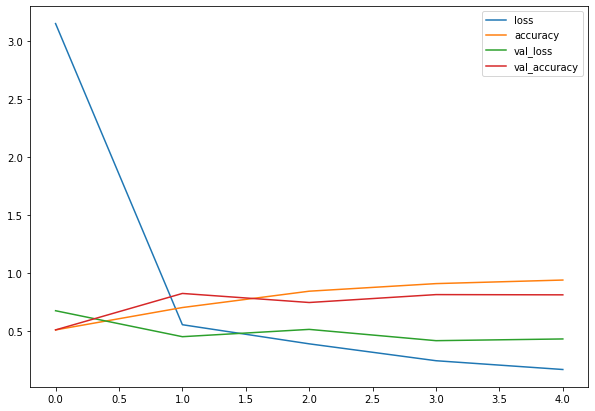

In [39]:
# Evaluate The Model

import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

# **Plot Validation and Training Curves Seperately**

In [40]:
def plot_loss_curves(history):

  '''
  Return Seperate Loss Curves for Training and Test Datasets
  '''

  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs=range(len(history.history['loss']))


  # Plot Loss

  plt.plot(epochs,loss, label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()


  # Plot Accuracy

  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()


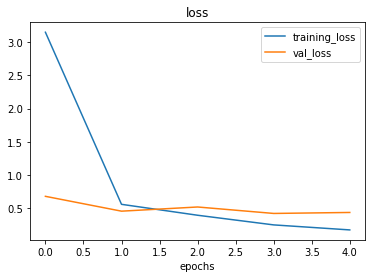

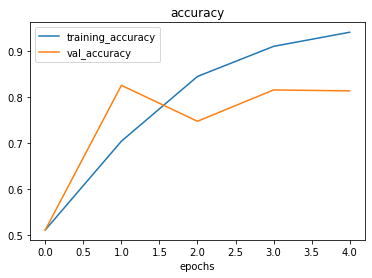

In [41]:
# Check Out Loss and Accuracy Of Models

plot_loss_curves(history_4)

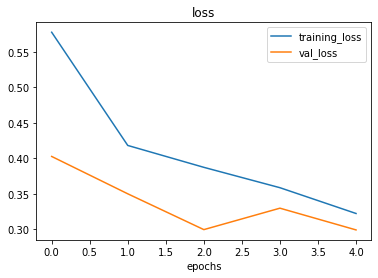

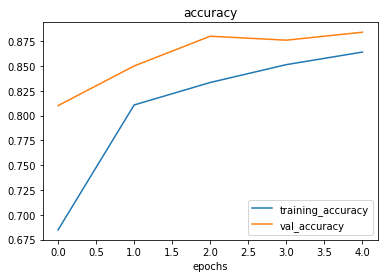

In [42]:
plot_loss_curves(history_1)

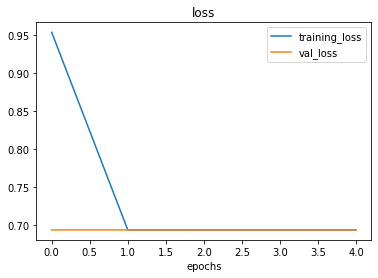

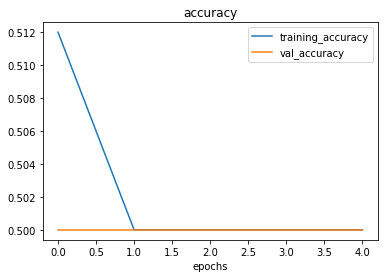

In [43]:
plot_loss_curves(history_2)

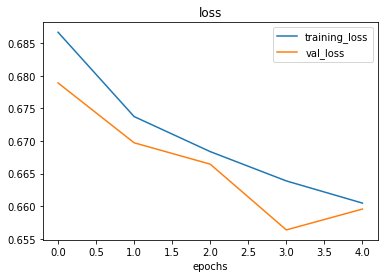

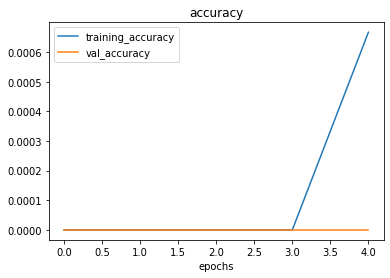

In [44]:
plot_loss_curves(history_3)

# **Adjust The Model Parameters**

**Fitting A Machine Learning Comes in 3 Steps:**

**1-Create The baseline**

**2-Beat Baseline By Overfitting**

**3-Reduce Overfitting**


# **Ways To Reduce Overfitting**

**1- Increase Number of Convolutional layers**

**2- Increase Number of Convolutional Filters**

**3- Add Dense Layer to output of our Flattend Layer**

# **Reduce Overfitting**

**1-Add Data Augmentation**

**2- Add Regulization layer(Such as MaxPool2D)**

**3- Add More Data**


In [45]:
# Create Model (This Is Going to Be New Baseline)

model_5 = Sequential([
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])


# Compile The Model

model_5.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics=['accuracy']
)


# Fit The Model

history_5 = model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data = test_data, validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 189ms/step - loss: 0.6548 - accuracy: 0.6113 - val_loss: 0.5706 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.5000 - accuracy: 0.7667 - val_loss: 0.4079 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4223 - accuracy: 0.8113 - val_loss: 0.3509 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4140 - accuracy: 0.8200 - val_loss: 0.3484 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3752 - accuracy: 0.8420 - val_loss: 0.3511 - val_accuracy: 0.8600


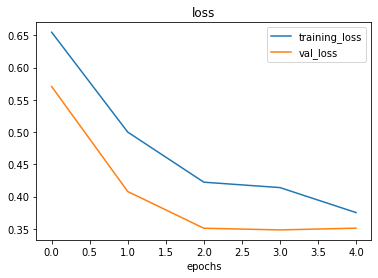

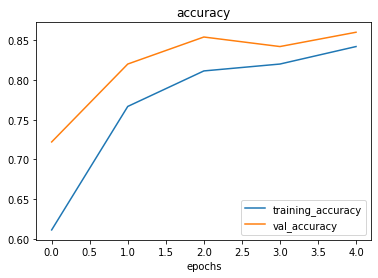

In [46]:
# Plot Loss Curves 

plot_loss_curves(history_5)

# **Reduce Overfitting By Data Augmentation**

**Opening Bag of Tricks & Find Data Augmentation**


In [47]:
# Opening Bag of Tricks & Find Data Augmentation

train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.3,
    horizontal_flip = True
)


# Create ImageDataGenerator Without DataAugmentation

train_datagen = ImageDataGenerator(rescale=1./255)

# Create ImageDataGenerator Without DataAugmentation

test_datagen = ImageDataGenerator(rescale=1./255)




# **What Is Data Augmentation**

**It is Process of Altering our training data, leading to have move Diversity**



In [48]:
# Import Data & Augment it From Training Directory

print('Augmented Training Data')

train_data_augmented = train_datagen.flow_from_directory(train_dir,
                                                            target_size= (224,224),
                                                            batch_size = 32,
                                                            class_mode = 'binary',
                                                            shuffle = False,
                                                            )

# Create Non Augmented Train Data Batches

print('Non Augmented Training Data')

train_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode = 'binary'
    
)

# Create Non Augmented Test Data Batches 

test_data = test_datagen.flow_from_directory(
    test_dir, target_size = (224,224),
    class_mode = 'binary'
    
)


Augmented Training Data
Found 1500 images belonging to 2 classes.
Non Augmented Training Data
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [49]:
# Data Augmentation is Usually Only Performed On Training Data

In [50]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Showing Image Number : 22


(-0.5, 223.5, 223.5, -0.5)

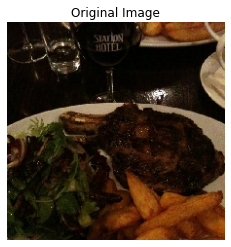

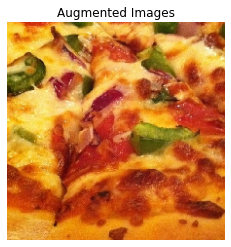

In [51]:
# Show Original And Augmented Images

import random
random_number = random.randint(0,32)
plt.imshow(images[random_number])
print(f"Showing Image Number : {random_number}")
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Images")
plt.axis(False)

# **Train CNN Model For Augmented Train Data**


In [52]:
model_6 = Sequential([
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])


model_6.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics=['accuracy']
    )

history_6 = model_6.fit(train_data_augmented, epochs=5, steps_per_epoch = len(train_data_augmented), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 188ms/step - loss: 0.7133 - accuracy: 0.4587 - val_loss: 0.6855 - val_accuracy: 0.5100
Epoch 2/5
47/47 [==============================] - 9s 181ms/step - loss: 0.6987 - accuracy: 0.5013 - val_loss: 0.6815 - val_accuracy: 0.6960
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6848 - accuracy: 0.5673 - val_loss: 0.6508 - val_accuracy: 0.5520
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6863 - accuracy: 0.5913 - val_loss: 0.6655 - val_accuracy: 0.6180
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6302 - accuracy: 0.6480 - val_loss: 0.5266 - val_accuracy: 0.7740


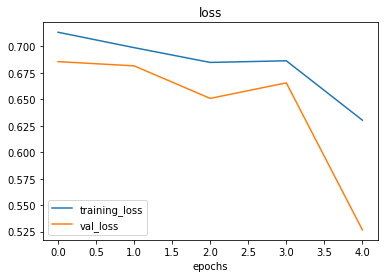

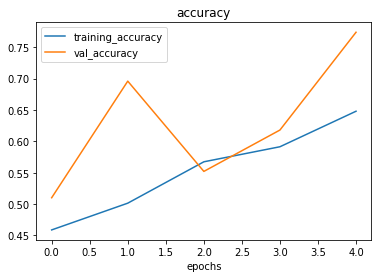

In [53]:
# Check History

plot_loss_curves(history_6)

# **Lets Shuffle Our Augmented Training Data**

In [54]:
train_data_augmented_shuffled = train_datagen.flow_from_directory(train_dir,
                                                            target_size= (224,224),
                                                            batch_size = 32,
                                                            class_mode = 'binary',
                                                            shuffle = False,
                                                            )


Found 1500 images belonging to 2 classes.


In [55]:
# Create The Model (same as Previous)

model_7 = Sequential([
                      Conv2D(10,7,activation='relu', input_shape=(224,224,3)),
                      MaxPool2D(),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='relu')
])

# Compile The Model

model_7.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics=['accuracy']
)

# Fit The Model

history_7 = model_7.fit(train_data_augmented_shuffled, epochs = 5, steps_per_epoch = len(train_data_augmented), validation_data = test_data, validation_steps =len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 197ms/step - loss: 7.7132 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000


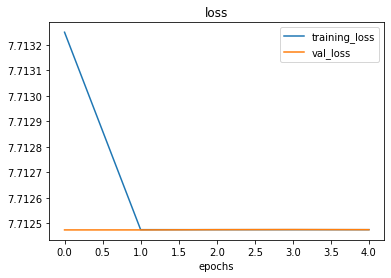

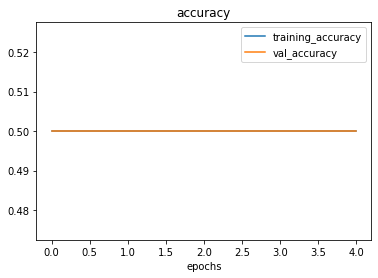

In [56]:
# plot Loss Curves 

plot_loss_curves(history_7)

 **When Shuffling Training Data, The Model Get Exposed To all Different Kinds Of Data During Enabling**

# **Repeat Untill Satisfied**

**To Improve Our Model**

**1- Increase Number of Model Layers**

**2- Increase Number Of Filters in Each Convolutional layers**

**3- Train it For Longer**

**4- Find Ideal Learning Rate**

**5- Get More Data**

**6- Use Tranfer Learning To Leverage What Another Image Model Has Learn**

# **Download Custom Image To Make Predictions**

In [57]:
# Classes We are Working with
class_names

array(['pizza', 'steak'], dtype='<U5')

--2022-02-18 05:21:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.04s   

2022-02-18 05:21:01 (86.8 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]



(-0.5, 5999.5, 3999.5, -0.5)

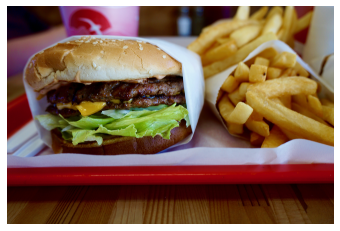

In [58]:
# View Our Example Image

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
hamburger = mpimg.imread('03-hamburger.jpeg')
plt.imshow(hamburger)
plt.axis(False)

--2022-02-18 05:21:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2022-02-18 05:21:05 (68.4 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



(-0.5, 3023.5, 4031.5, -0.5)

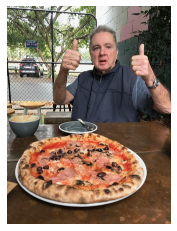

In [59]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pizza = mpimg.imread('03-pizza-dad.jpeg')
plt.imshow(pizza)
plt.axis(False)

--2022-02-18 05:21:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2022-02-18 05:21:07 (56.8 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

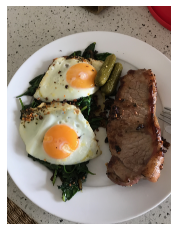

In [60]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

--2022-02-18 05:21:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.04s   

2022-02-18 05:21:09 (46.6 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]



(-0.5, 4031.5, 3023.5, -0.5)

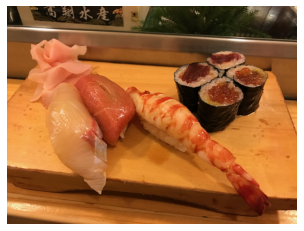

In [61]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
sushi = mpimg.imread('03-sushi.jpeg')
plt.imshow(sushi)
plt.axis(False)

# **Writing Helper Function To Preprocess The Image**

**When You Train a Neural Network and You want to make Predictions on own custom data , it is imoportant that custom data is preprocessed into same format as your model was turned on**

In [62]:
steak.shape

(4032, 3024, 3)

# **Create Function to import and Image And Resize it With our Model**

In [63]:
def load_and_prep_image(filename,img_shape=224):

  # Read In The Image 

  img = tf.io.read_file(filename)

  # Decode The File Into Tensor

  img = tf.image.decode_image(img, channels=3)

  # Resize The Image

  img = tf.image.resize(img , size = [img_shape,img_shape])

  #Rescale The Image(into 0 & 1)

  img = img/255.

  return img

In [64]:
# Load  in And Preprcess The Custom Image

steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

# **Making Predictions On Custom Data**

In [65]:
# Remind Ourselves For Class Names

class_names

array(['pizza', 'steak'], dtype='<U5')

In [66]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 194ms/step - loss: 0.9824 - accuracy: 0.4880 - val_loss: 0.6863 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 12s 247ms/step - loss: 0.6890 - accuracy: 0.5313 - val_loss: 0.6821 - val_accuracy: 0.5160
Epoch 3/5
47/47 [==============================] - 13s 268ms/step - loss: 0.6832 - accuracy: 0.5173 - val_loss: 0.6669 - val_accuracy: 0.5160
Epoch 4/5
47/47 [==============================] - 10s 212ms/step - loss: 0.6643 - accuracy: 0.5540 - val_loss: 0.6752 - val_accuracy: 0.7000
Epoch 5/5
47/47 [==============================] - 12s 264ms/step - loss: 0.6550 - accuracy: 0.6960 - val_loss: 0.6324 - val_accuracy: 0.5900


In [67]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [68]:
pred = model_8.predict(steak)

In [69]:
# We can Index Predicted Class By Rounding Predictions Probability. 

pred_class = class_names[int(tf.round(pred[0][0]))]
pred_class

'steak'

In [123]:
def pred_and_plot(model, filename, class_names):

  # Import The Target Image and Preprocess it

  img = load_and_prep_image(filename)

  # Make A Prediction 

  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get The Predicted Class

  pred_class = class_names[int(tf.round(pred))]

  # Plot The Image and Predicted Class

  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False);

# **Adjust Thus Function For Multiclass**

In [125]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

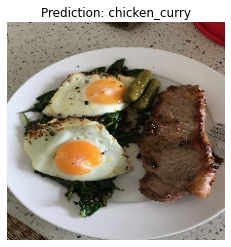

In [127]:
# Test On Model On Custom Image

pred_and_plot(model_7, '03-steak.jpeg', class_names)

# **Lets Try It With Different Images**

--2022-02-18 05:22:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg.1’

03-hamburger.jpeg.1 100%[===================>]   3.40M  --.-KB/s    in 0.05s   

2022-02-18 05:22:16 (62.2 MB/s) - ‘03-hamburger.jpeg.1’ saved [3564285/3564285]



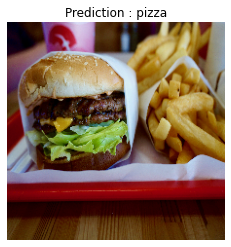

In [72]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
pred_and_plot(model_7, '03-hamburger.jpeg')

--2022-02-18 05:22:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2022-02-18 05:22:17 (60.8 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



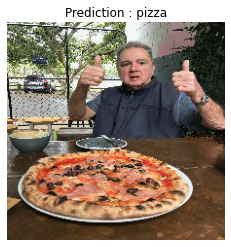

In [73]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, '03-pizza-dad.jpeg')

--2022-02-18 05:22:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2022-02-18 05:22:17 (54.1 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



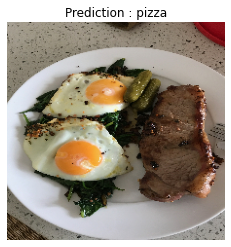

In [74]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
pred_and_plot(model_7, '03-steak.jpeg')

--2022-02-18 05:22:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg.1’

03-sushi.jpeg.1     100%[===================>]   1.64M  --.-KB/s    in 0.03s   

2022-02-18 05:22:17 (54.5 MB/s) - ‘03-sushi.jpeg.1’ saved [1725178/1725178]



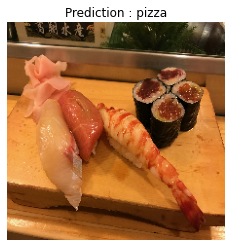

In [75]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
pred_and_plot(model_7, '03-sushi.jpeg')

# **Multiclass Image Classification**

**1- Become One With Data**

**2- Preprocess The Data(Get it ready for Mobile)**

**3- Create A Model**

**4-Fit The Model (Overlift to make sure it works)**

**5- Evaluate The Model**

**6- Adjust Different Hyperparameters and Impress The Model**

**7- Repeat Untill Satisfied**




In [78]:
# Become With  With Data

import zipfile 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip Our Data

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

--2022-02-18 05:23:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.199.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   218MB/s    in 2.3s    

2022-02-18 05:23:08 (218 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [79]:
import os

# Walk Through 10 classes of Food Image Data

for dirpath, dirnames,filenames in os.walk('10_food_classes_all_data'):
  print(f"There are  {len(dirnames)} Directories and {len(filenames)} Images in '{dirpath}'")

There are  2 Directories and 0 Images in '10_food_classes_all_data'
There are  10 Directories and 0 Images in '10_food_classes_all_data/test'
There are  0 Directories and 250 Images in '10_food_classes_all_data/test/ice_cream'
There are  0 Directories and 250 Images in '10_food_classes_all_data/test/sushi'
There are  0 Directories and 250 Images in '10_food_classes_all_data/test/pizza'
There are  0 Directories and 250 Images in '10_food_classes_all_data/test/chicken_curry'
There are  0 Directories and 250 Images in '10_food_classes_all_data/test/steak'
There are  0 Directories and 250 Images in '10_food_classes_all_data/test/hamburger'
There are  0 Directories and 250 Images in '10_food_classes_all_data/test/ramen'
There are  0 Directories and 250 Images in '10_food_classes_all_data/test/chicken_wings'
There are  0 Directories and 250 Images in '10_food_classes_all_data/test/fried_rice'
There are  0 Directories and 250 Images in '10_food_classes_all_data/test/grilled_salmon'
There are 

In [84]:
# Setup The Train and Test Directories

train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

# Lets Get Class Names

import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image Shape : (512, 512, 3)


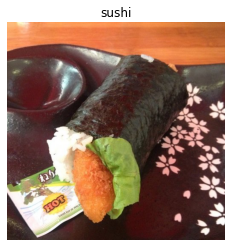

In [88]:
# Visualize , Visualize, #Visualize

import random
img = view_random_image(target_dir = train_dir, target_class = random.choice(class_names))

# **Preprocess The Data**

In [89]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [90]:
# Rescale

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load Data From Directories and Turn It Into Batches

train_data = train_datagen.flow_from_directory(train_dir, target_size = (224,224), batch_size = 32, class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir, target_size= (224,224), batch_size=32, class_mode = 'categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# **Created A Model (Starts With Basline)**



In [91]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

In [92]:
# Created A Model

model_9 = Sequential([
                      Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(),
                      Conv2D(10,3,activation='relu'),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10,activation='softmax')
])

# Compile The Model

model_9.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(),
    metrics=['accuracy']
)


# Fit The Model

history_9 = model_9.fit(train_data, epochs=5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 195ms/step - loss: 2.1609 - accuracy: 0.2205 - val_loss: 2.0257 - val_accuracy: 0.2772
Epoch 2/5
235/235 [==============================] - 64s 273ms/step - loss: 1.9654 - accuracy: 0.3152 - val_loss: 1.9226 - val_accuracy: 0.3272
Epoch 3/5
235/235 [==============================] - 54s 230ms/step - loss: 1.7934 - accuracy: 0.3796 - val_loss: 1.9233 - val_accuracy: 0.3364
Epoch 4/5
235/235 [==============================] - 44s 187ms/step - loss: 1.4517 - accuracy: 0.5152 - val_loss: 1.9121 - val_accuracy: 0.3416
Epoch 5/5
235/235 [==============================] - 45s 193ms/step - loss: 0.8722 - accuracy: 0.7147 - val_loss: 2.4808 - val_accuracy: 0.2936


In [93]:
# Evaluate The Model 

model_8.evaluate(test_data)


79/79 [==============================] - 11s 131ms/step - loss: 0.9137 - accuracy: 0.2162


[0.9137465953826904, 0.21616002917289734]

In [94]:
model_9.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 2.4808 - accuracy: 0.2936


[2.480790138244629, 0.2935999929904938]

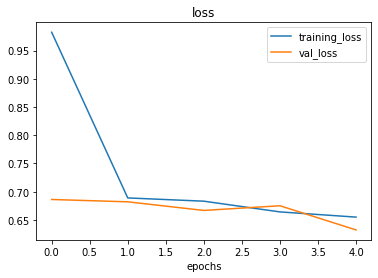

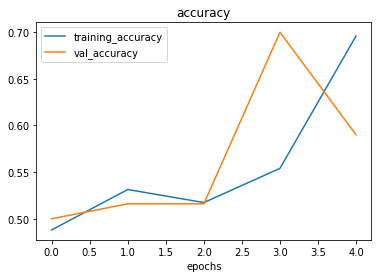

In [95]:
# Check Out Model Loss Curves

plot_loss_curves(history_8)

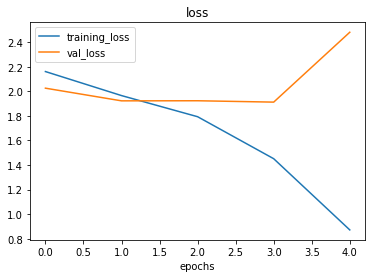

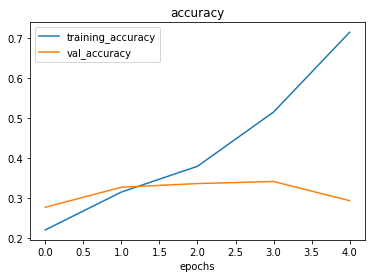

In [96]:
plot_loss_curves(history_9)

**It Seems Like Model is Overfitting**

# **Adjust Model Hyperparameters**

**Due to its Performance on training data, it is Clear That Our Model is Learning Something**

**So, Lets Try And Fix Overfitting by :**
**1-Get More Data**

**2- Simplify The Model**

**3- Use Data Augmentation**

**4-Use Tranfer Learning**


In [97]:
# How About We Try To Simpilify Model First

model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [98]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [99]:
# Lets Try to Remove 2 Convolutional Layers


# **Model No 10**

In [100]:
model_10 = Sequential([
                       Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
                       MaxPool2D(),
                       Conv2D(10,3,activation='relu'),
                       MaxPool2D(),
                       Flatten(),
                       Dense(10, activation='softmax')
])

# Compile The Model

model_10.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(),
    metrics=['accuracy']
)


# Fit The Model

history_10 = model_10.fit(train_data, epochs=5, steps_per_epoch = len(train_data) , validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 58s 246ms/step - loss: 2.1769 - accuracy: 0.2199 - val_loss: 2.1103 - val_accuracy: 0.2496
Epoch 2/5
235/235 [==============================] - 46s 194ms/step - loss: 1.8859 - accuracy: 0.3540 - val_loss: 1.9323 - val_accuracy: 0.3140
Epoch 3/5
235/235 [==============================] - 42s 180ms/step - loss: 1.6157 - accuracy: 0.4556 - val_loss: 1.9985 - val_accuracy: 0.3076
Epoch 4/5
235/235 [==============================] - 42s 180ms/step - loss: 1.1892 - accuracy: 0.6108 - val_loss: 2.0901 - val_accuracy: 0.3180
Epoch 5/5
235/235 [==============================] - 43s 181ms/step - loss: 0.7070 - accuracy: 0.7851 - val_loss: 2.6097 - val_accuracy: 0.2892


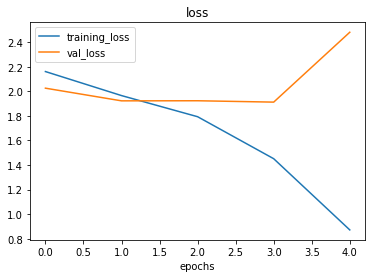

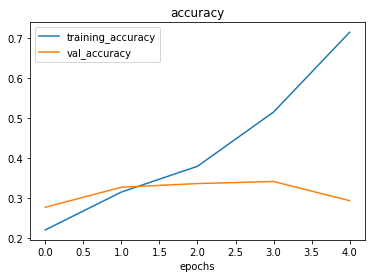

In [101]:
# Check Out Loss - Curves

plot_loss_curves(history_9)

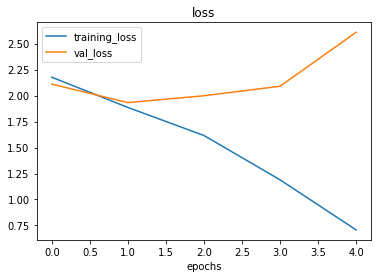

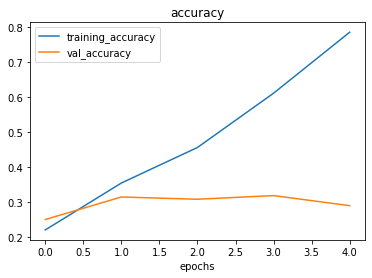

In [102]:
plot_loss_curves(history_10)

**Looks Like Our Simplifying The Model Did Not Work**

# **Data Augmentation For Reduce Overfitting**

**Lets Try And Improve Our Model Reslts By Using Augmented Data**

**Ideally We Want to:**

**1- Reduce Overfiiting**

**2- Improve Validation Accuracy**

In [103]:
# Created Augmented Data Generator

train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True)

train_data_augmented =  train_datagen_augmented.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode='categorical') 

Found 7500 images belonging to 10 classes.


# **Lets Create Another Model**

In [104]:
model_11 = tf.keras.models.clone_model(model_10)

# Compile The Cloned Model

model_11.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(),
    metrics=['accuracy']
)

history_11= model_11.fit(train_data_augmented, epochs=5, steps_per_epoch =  len(train_data_augmented), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 131s 555ms/step - loss: 2.1983 - accuracy: 0.2228 - val_loss: 2.0447 - val_accuracy: 0.2736
Epoch 2/5
235/235 [==============================] - 106s 453ms/step - loss: 2.0376 - accuracy: 0.2836 - val_loss: 1.9292 - val_accuracy: 0.3244
Epoch 3/5
235/235 [==============================] - 106s 451ms/step - loss: 1.9891 - accuracy: 0.3071 - val_loss: 1.9214 - val_accuracy: 0.3328
Epoch 4/5
235/235 [==============================] - 106s 451ms/step - loss: 1.9623 - accuracy: 0.3176 - val_loss: 1.8562 - val_accuracy: 0.3484
Epoch 5/5
235/235 [==============================] - 106s 450ms/step - loss: 1.9193 - accuracy: 0.3437 - val_loss: 1.8232 - val_accuracy: 0.3676


In [105]:
model_10.evaluate(test_data)

79/79 [==============================] - 10s 131ms/step - loss: 2.6097 - accuracy: 0.2892


[2.609722137451172, 0.2892000079154968]

In [106]:
model_11.evaluate(test_data)

79/79 [==============================] - 10s 131ms/step - loss: 1.8232 - accuracy: 0.3676


[1.8232306241989136, 0.3675999939441681]

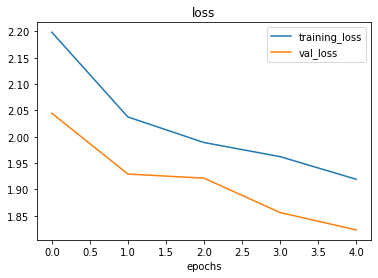

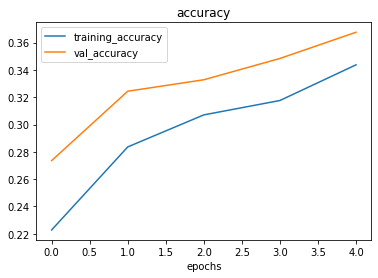

In [107]:
# Check Out Our Model Trained On Augmented Data
plot_loss_curves(history_11)

**Thats Looks Much Better Than Previous Ones. Our Loss Curves Are Much closer To Baseline**

# **Repeat Untill Satisfied**

**We Could Keep Going Have Continually Trying to Bring Our Losss Curves Close Together And Trying to Improve Validation and Test Accuracy**

**How**

**Restructing Our Model Architecture**

**Adjusting Learning Rate**

**Try Different Methods of Data Augmentation**

**Training For Longer**

**Try Transfer Learning**

# **Make A Prediction  With Our Trained Model**

**lets Use Our Trained Model  to make some predictions on custom images**



In [108]:
# Remind Class Name
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [109]:
# Downloading Custom Images 

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2022-02-18 06:24:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg.2’

03-hamburger.jpeg.2 100%[===================>]   3.40M  --.-KB/s    in 0.04s   

2022-02-18 06:24:53 (87.2 MB/s) - ‘03-hamburger.jpeg.2’ saved [3564285/3564285]

--2022-02-18 06:24:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awai

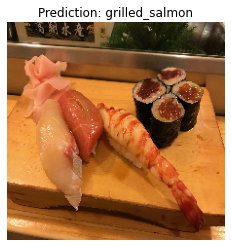

In [128]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

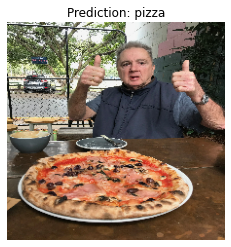

In [129]:
pred_and_plot(model_11, '03-pizza-dad.jpeg', class_names)

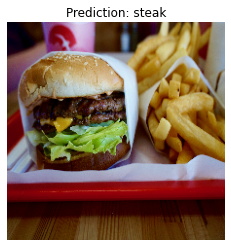

In [130]:
pred_and_plot(model_11, '03-hamburger.jpeg', class_names)

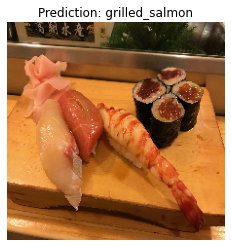

In [131]:
pred_and_plot(model_11, '03-sushi.jpeg', class_names)

# **But Before Prediction Function , Recreate The Pred and Plot Function With Adding Some Logic**

In [132]:
def pred_and_plot(model, filename, class_names):

  # Import The Target Image and Preprocess it

  img = load_and_prep_image(filename)

  # Make A Prediction 

  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get The Predicted Class
  
  if len(pred[0])>1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot The Image and Predicted Class

  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False);

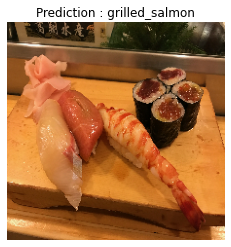

In [133]:
pred_and_plot(model_11, '03-sushi.jpeg', class_names)

# **Saving & Loading Our CNN Model**

In [134]:
model_11.save('saved_trained_model')

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [135]:
# Load In Trained Model And Evaluate It 

loaded_model_10 = tf.keras.models.load_model('saved_trained_model')

In [138]:
# Compare Models

model_11.evaluate(test_data)

79/79 [==============================] - 12s 147ms/step - loss: 1.8232 - accuracy: 0.3676


[1.8232306241989136, 0.3675999939441681]

In [139]:
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 10s 131ms/step - loss: 1.8232 - accuracy: 0.3676


[1.8232306241989136, 0.3675999939441681]

# **This Is The End Of COMPUTER VISION AND CNN (CONVOLUTIONAL NEURAL NETWORK)**